# Changes in HbA1c Levels During COVID-19 

This notebook describes trends and deviations in HbA1c test results during the COVID-19 pandemic at large and by specific demographic groups. In particular, I report the trends across the mean of test results by month for the following sets: 
1. All tests reported
2. Tests taken by patients with type 1 diabetes
3. Tests taken by patients with type 2 diabetes

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from glob import glob

pd.set_option('display.max_rows', None)

In [2]:
def compute_mean(df_in, group): 
    """
    Computes mean HbA1c levels by demographic group & month.
    
    Arg: 
        df_in (df): Input dataframe
        group (str): Demographic group such as 'age_group', 
                     'sex', 'imd', 'region', and 'ethnicity'
                     
    Returns:
        Dataframe (df): Dataframe of means by month
    """
    return pd.DataFrame(
        df_in.groupby(by=['date',group])['hba1c_mmol_per_mol'].mean()
    ).reset_index().sort_values(by='date')
    
def create_chart(df_in, group, title, min, max):
    """
    Outputs chart demonstrating trends in HbA1c levels by 
    demographic group & month.
    
    Args: 
        df_in (df): Input dataframe
        group (str): Demographic group such as 'age_group', 
                     'sex', 'imd', 'region', and 'ethnicity'
    """
    plt.figure(figsize = (15,8))
    # Recast IMD to string (correct legend label)
    if group == 'imd':
        df_in.imd = df_in.imd.astype(str)
    elif group == 'ethnicity':
        df_in.ethnicity = df_in.ethnicity.astype(str)
    # Plot error bars if full population chart
    if (
        group=='population'
    ):
        ax = sns.lineplot(x = 'date', y = 'hba1c_mmol_per_mol', data = df_in)
    else:
        ax = sns.lineplot(x = 'date', y = 'hba1c_mmol_per_mol', 
                          hue = group, data = df_in, ci=None)
        ax.legend().set_title(None)
    locs, labels = plt.xticks()
    plt.xlabel('Date')
    plt.ylabel('HbA1c (mmol/mol)')
    plt.ylim(min,max) 
    plt.title(title + "\n")
    plt.setp(labels, rotation=65)
    plt.show()
    print('\n')
    
def df_wide(df_in, col):
    """
    Reformat dataframes from long to wide for table formatting
    
    Args: 
        df_in (df): Input dataframe
        group (str): Demographic group such as 'age_group', 
                     'sex', 'imd', 'region', and 'ethnicity'
    """
    return df_in.pivot(index='date', columns=col, values='hba1c_mmol_per_mol')

In [3]:
# Read in input files
li = []

for file in glob('../output/data/input*.csv'):
    if file.split('_')[1] not in ['ethnicity.csv']:
        df_temp = pd.read_csv(file)
        df_temp['date'] = file[21:-4]
        li.append(df_temp)
    
df_input = pd.concat(li, axis=0, ignore_index=False).reset_index(drop=True)
df_t1 = df_input.loc[df_input.diabetes_t1 == 1].reset_index(drop=True)
df_t2 = df_input.loc[df_input.diabetes_t2 == 1].reset_index(drop=True)

In [4]:
# Reformat labels

# Ethnicity
dict_eth = {1: 'White', 2: 'Mixed', 3: 'Asian',
            4: 'Black', 5: 'Other', np.nan: 'Unknown',
            0: 'Unknown'}
df_input = df_input.replace({"ethnicity": dict_eth})
df_t1 = df_t1.replace({"ethnicity": dict_eth})
df_t2 = df_t2.replace({"ethnicity": dict_eth})

# IMD
dict_imd = {0: 'Unknown', 1: '1 Most deprived', 2: '2',
            3: '3', 4: '4', 5: '5 Least deprived'}
df_input = df_input.replace({'imd': dict_imd})
df_t1 = df_t1.replace({'imd': dict_imd})
df_t2 = df_t2.replace({'imd': dict_imd})

# Diabetes type
dict_dm_type = {'NO_DM': 'No diabetes', 'T1DM': 'Type 1', 
                'T2DM': 'Type 2', 'UNKNOWN_DM': 'Unknown diabetes'}
df_input = df_input.replace({'diabetes_type': dict_dm_type})

# Learning disability
dict_ld = {1:'Yes', 0:'No'}
df_input = df_input.replace({'learning_disability': dict_ld})
df_t1 = df_t1.replace({'learning_disability': dict_ld})
df_t2 = df_t2.replace({'learning_disability': dict_ld})

## All Tests

In [5]:
all_min = 30
all_max = 60

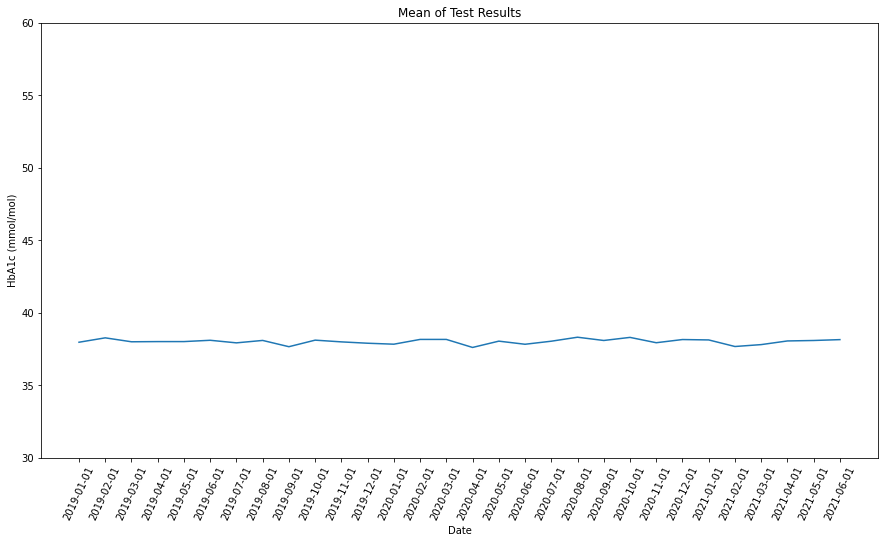

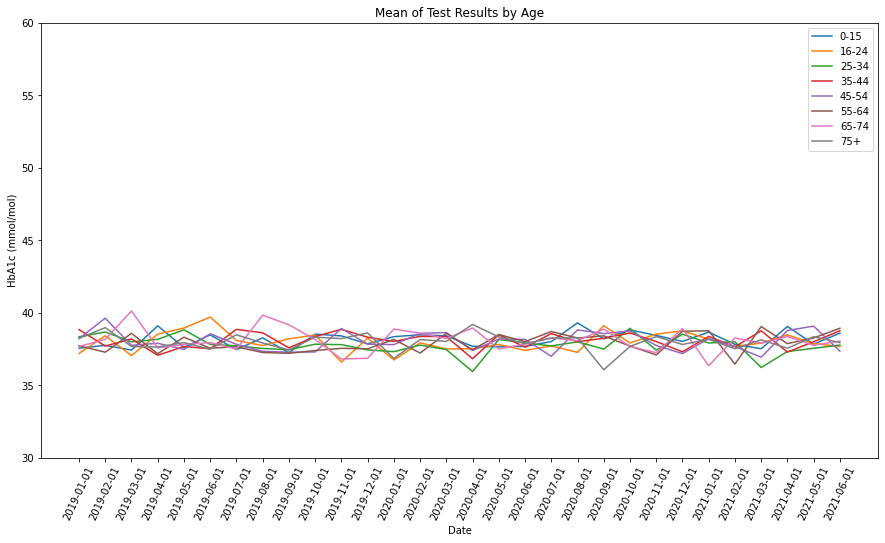

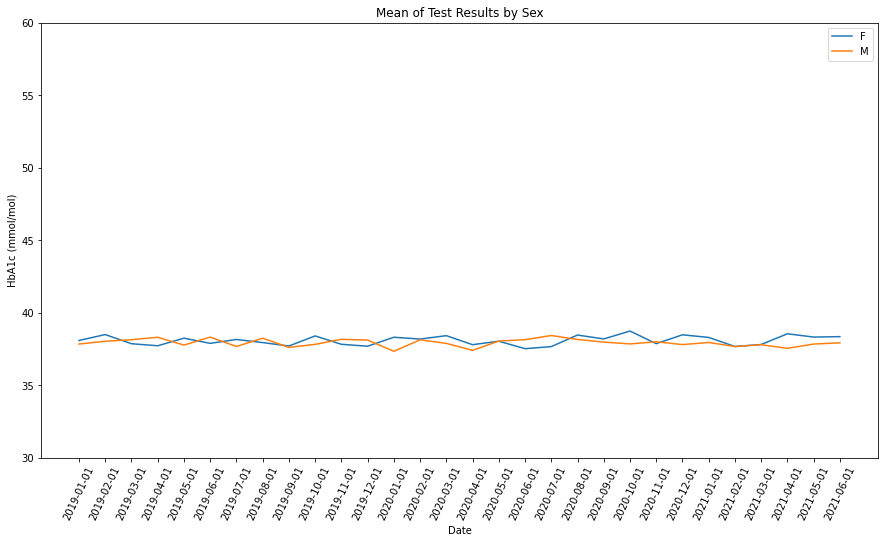

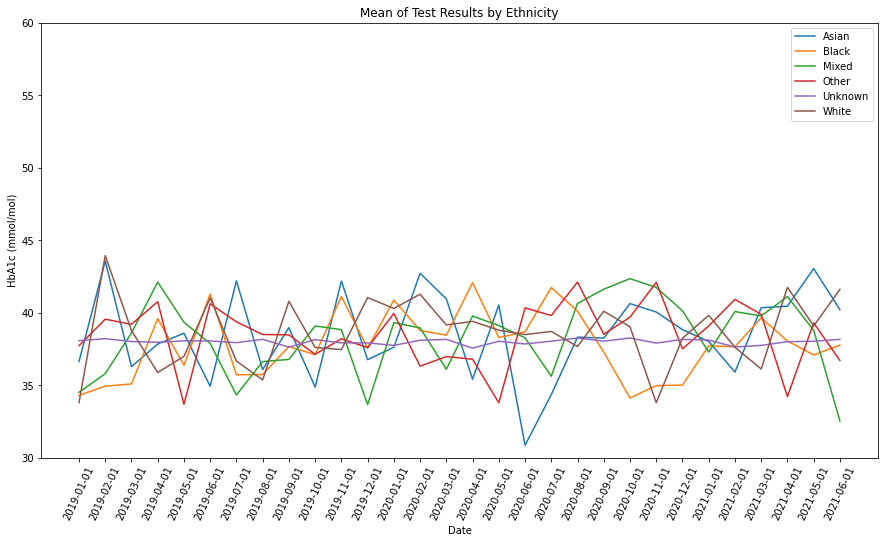

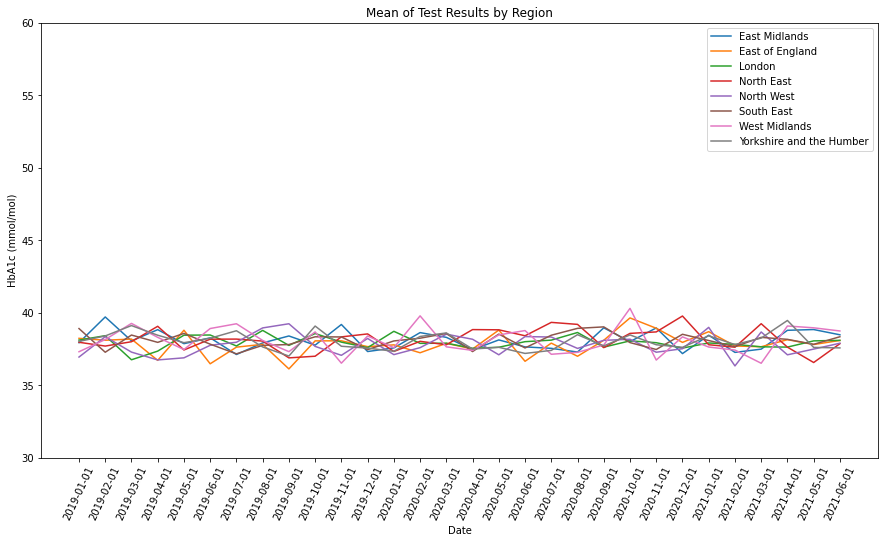

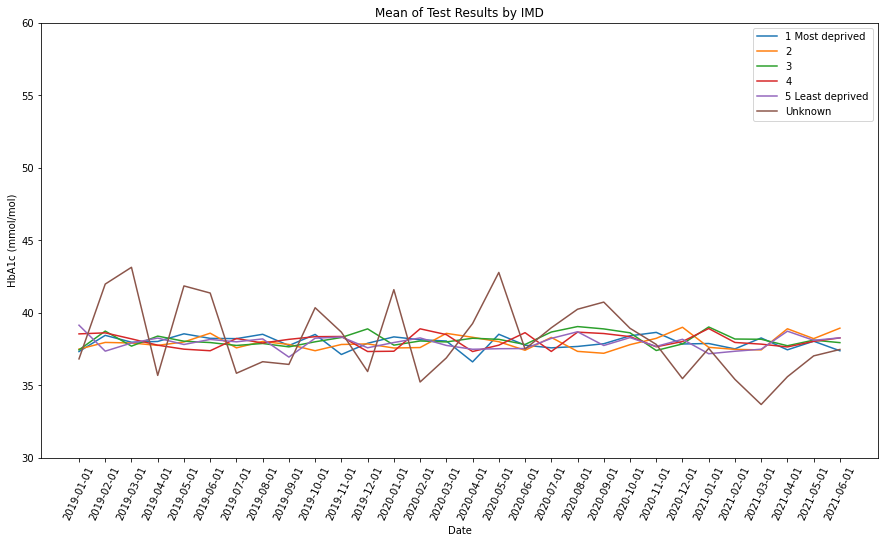

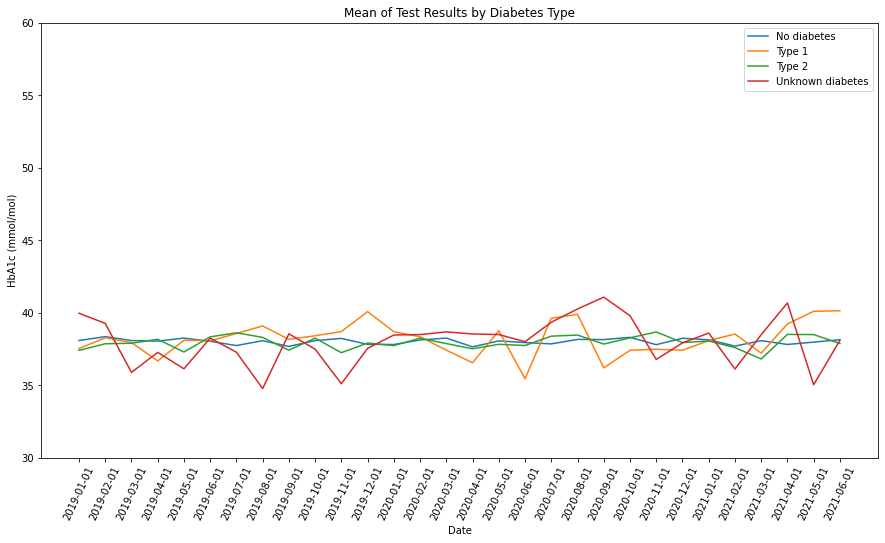

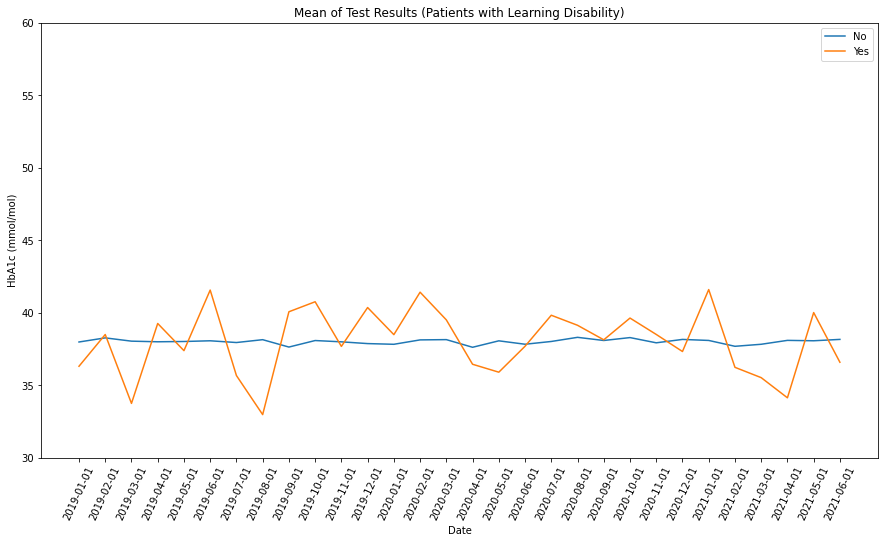

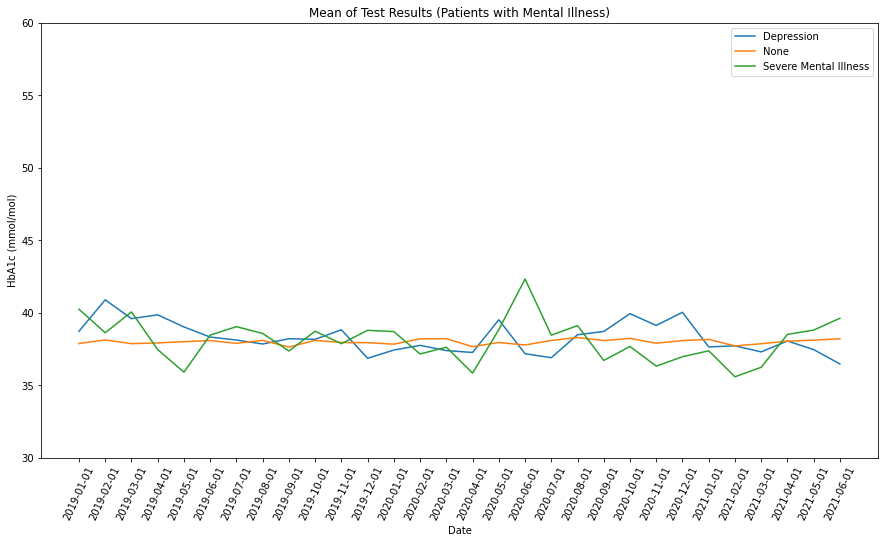

In [6]:
# Population
df_pop = pd.DataFrame(df_input.groupby(by=['date'])['hba1c_mmol_per_mol'].mean()).reset_index()
create_chart(df_pop, 'population', 'Mean of Test Results', all_min, all_max)

# Age
df_age = compute_mean(df_input, 'age_group')
create_chart(df_age.loc[df_age.age_group != 'missing'], 'age_group', 'Mean of Test Results by Age', all_min, all_max)

# Sex
df_sex = compute_mean(df_input, 'sex')
create_chart(df_sex.loc[df_sex.sex.isin(['F','M'])], 'sex', 'Mean of Test Results by Sex', all_min, all_max)

# Ethnicity
df_eth = compute_mean(df_input, 'ethnicity')
create_chart(df_eth, 'ethnicity', 'Mean of Test Results by Ethnicity', all_min, all_max)

# Region
df_region = compute_mean(df_input, 'region')
create_chart(df_region, 'region', 'Mean of Test Results by Region', all_min, all_max)

# IMD
df_imd = compute_mean(df_input, 'imd')
create_chart(df_imd, 'imd', 'Mean of Test Results by IMD', all_min, all_max)

# Learning Disability
df_ld = compute_mean(df_input, 'learning_disability')
create_chart(df_ld, 'learning_disability', 'Mean of Test Results (Patients with Learning Disability)', all_min, all_max)

# Mental Illness
df_mi = compute_mean(df_input, 'mental_illness')
create_chart(df_mi, 'mental_illness', 'Mean of Test Results (Patients with Mental Illness)', all_min, all_max)

In [7]:
### Create and display tables showing exact values by month

# Population
display(df_pop)

# Age 
display(df_wide(df_age, 'age_group'))

# Sex
display(df_wide(df_sex, 'sex'))

# Ethnicity
df_eth_wide = df_wide(df_eth, 'ethnicity')
df_eth_wide = df_eth_wide[['Asian', 'Black', 'Mixed', 'White', 'Other', 'Unknown']]
display(df_eth_wide)

# Region
display(df_wide(df_region, 'region'))

# IMD
display(df_wide(df_imd, 'imd'))

# Learning Disability
display(df_wide(df_ld, 'learning_disability'))

# Mental Illness
df_mi_wide = df_wide(df_mi, 'mental_illness')
df_mi_wide = df_mi_wide[['None', 'Depression', 'Severe Mental Illness']]
display(df_mi_wide)

,date,hba1c_mmol_per_mol
0,2019-01-01,37.970886
1,2019-02-01,38.273850
2,2019-03-01,38.002339
3,2019-04-01,38.015208
4,2019-05-01,38.015712
5,2019-06-01,38.105821
6,2019-07-01,37.927919
7,2019-08-01,38.095157
8,2019-09-01,37.662739
9,2019-10-01,38.114834


age_group,0-15,16-24,25-34,35-44,45-54,55-64,65-74,75+,missing
date,,,,,,,,,
2019-01-01,37.557126,37.195357,38.344285,38.845382,38.220131,37.726172,37.683460,38.232298,37.365042
2019-02-01,37.759296,38.418481,38.677323,37.705632,39.632537,37.283644,38.167268,38.980936,38.624129
2019-03-01,37.427967,37.050153,37.998825,38.197763,37.756402,38.581116,40.131277,37.673368,37.176666
2019-04-01,39.102660,38.529429,38.171594,37.071157,37.898445,37.180884,37.579589,37.641266,40.366551
2019-05-01,37.607379,38.950129,38.823186,37.677308,37.476877,38.318779,37.816253,37.947798,38.987913
2019-06-01,38.483541,39.706266,37.819913,37.517720,38.552407,37.559618,37.945722,37.490492,38.263709
2019-07-01,37.459275,38.091810,37.725251,38.856618,37.829906,37.655762,37.495514,38.484763,36.395720
2019-08-01,38.278082,37.741110,37.542732,38.621074,37.347394,37.260784,39.834751,37.918862,36.936832
2019-09-01,37.248136,38.209040,37.459325,37.585341,37.279850,37.207290,39.174023,37.436659,38.932086


sex,F,M
date,,
2019-01-01,38.091149,37.846961
2019-02-01,38.499717,38.037349
2019-03-01,37.868957,38.145053
2019-04-01,37.726643,38.313397
2019-05-01,38.250634,37.774699
2019-06-01,37.893473,38.325602
2019-07-01,38.161750,37.679026
2019-08-01,37.947611,38.249898
2019-09-01,37.710273,37.613285


ethnicity,Asian,Black,Mixed,White,Other,Unknown
date,,,,,,
2019-01-01,36.644042,34.303472,34.516397,33.802171,37.731507,38.078266
2019-02-01,43.575678,34.941601,35.803961,43.941579,39.562183,38.216463
2019-03-01,36.285797,35.093879,38.611284,38.783583,39.206203,38.020895
2019-04-01,37.847221,39.597932,42.120195,35.885130,40.768866,37.968839
2019-05-01,38.588574,36.384034,39.349884,36.992811,33.688695,38.064488
2019-06-01,34.932214,41.294849,37.879830,41.024670,40.622596,38.059873
2019-07-01,42.204972,35.728408,34.331805,36.669335,39.376186,37.942536
2019-08-01,36.085281,35.739305,36.637934,35.370842,38.503244,38.171933
2019-09-01,38.980824,37.672974,36.784697,40.793781,38.478840,37.632498


region,East Midlands,East of England,London,North East,North West,South East,West Midlands,Yorkshire and the Humber
date,,,,,,,,
2019-01-01,37.937777,38.239793,38.120351,37.967553,36.948953,38.913847,37.315496,38.026052
2019-02-01,39.714837,38.109208,38.422228,37.706567,38.352480,37.280811,38.157713,38.404903
2019-03-01,38.064822,38.189640,36.761011,38.006020,37.289803,38.467128,39.270085,39.120514
2019-04-01,38.838491,36.722070,37.358421,39.070901,36.750234,37.961989,38.307255,38.454687
2019-05-01,37.872237,38.798472,38.457663,37.436759,36.894850,38.578747,37.467302,37.940208
2019-06-01,38.271794,36.484365,38.469086,38.180734,37.760564,37.837784,38.916742,38.246400
2019-07-01,37.124531,37.632195,37.713422,38.187944,37.969330,37.170852,39.245169,38.763145
2019-08-01,37.923811,37.824851,38.787309,38.050067,38.958667,37.755785,38.093885,37.645161
2019-09-01,38.402735,36.130511,37.751742,36.892018,39.245777,37.811115,37.321972,37.018372


imd,1 Most deprived,2,3,4,5 Least deprived,Unknown
date,,,,,,
2019-01-01,37.327561,37.495201,37.440828,38.547046,39.146244,36.821802
2019-02-01,38.445689,37.958068,38.739724,38.618120,37.355177,41.983031
2019-03-01,37.972956,37.919098,37.702533,38.203217,37.918980,43.140148
2019-04-01,38.024599,37.754362,38.393145,37.767661,38.256561,35.682792
2019-05-01,38.552242,37.990185,38.041486,37.492737,37.815508,41.855535
2019-06-01,38.237557,38.595896,37.949387,37.384310,38.163407,41.365586
2019-07-01,38.219228,37.582024,37.749046,38.229129,37.999633,35.832135
2019-08-01,38.519279,38.025210,37.884196,37.918022,38.200618,36.627071
2019-09-01,37.742159,37.817912,37.651496,38.170229,36.945041,36.441147


diabetes_type,No diabetes,Type 1,Type 2,Unknown diabetes
date,,,,
2019-01-01,38.090508,37.533566,37.407399,39.973371
2019-02-01,38.355672,38.277608,37.865468,39.268529
2019-03-01,38.088301,37.944579,37.901232,35.892721
2019-04-01,38.047317,36.681984,38.176284,37.270197
2019-05-01,38.255813,38.110679,37.296137,36.138407
2019-06-01,38.037239,38.072477,38.341137,38.253507
2019-07-01,37.742076,38.570802,38.624792,37.280682
2019-08-01,38.076814,39.096637,38.304587,34.777213
2019-09-01,37.683212,38.169453,37.424988,38.550220


learning_disability,No,Yes
date,,
2019-01-01,37.987621,36.314114
2019-02-01,38.271525,38.504040
2019-03-01,38.045279,33.751286
2019-04-01,38.002588,39.264683
2019-05-01,38.022027,37.390514
2019-06-01,38.070837,41.569319
2019-07-01,37.950690,35.673564
2019-08-01,38.146842,32.978403
2019-09-01,37.638396,40.072743


mental_illness,None,Depression,Severe Mental Illness
date,,,
2019-01-01,37.879929,38.729482,40.249387
2019-02-01,38.129536,40.897565,38.624408
2019-03-01,37.872984,39.598950,40.062198
2019-04-01,37.924607,39.861107,37.462140
2019-05-01,38.007956,39.025220,35.907136
2019-06-01,38.086765,38.327378,38.463076
2019-07-01,37.894413,38.122853,39.045614
2019-08-01,38.099394,37.849107,38.574811
2019-09-01,37.637585,38.212760,37.368377


## Tests Taken by Patients with Type 1 Diabetes

In [8]:
t1_min = 40
t1_max = 80

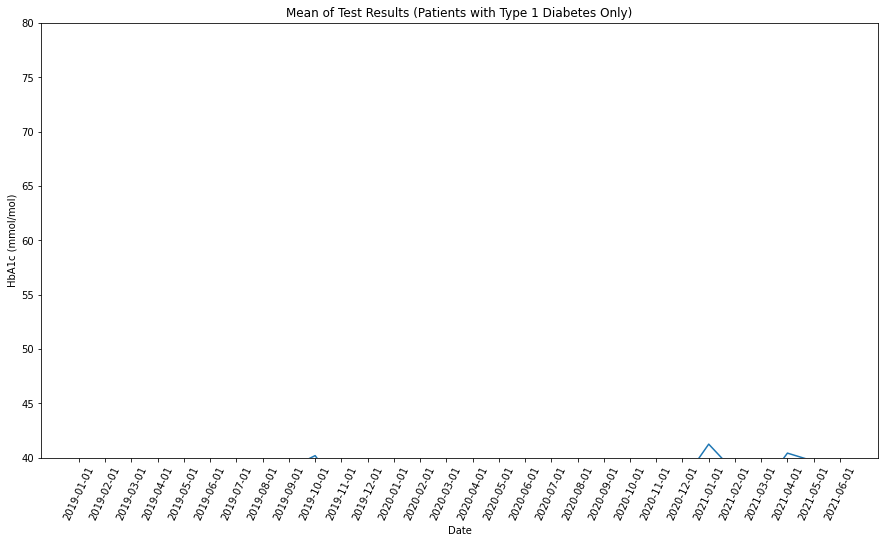

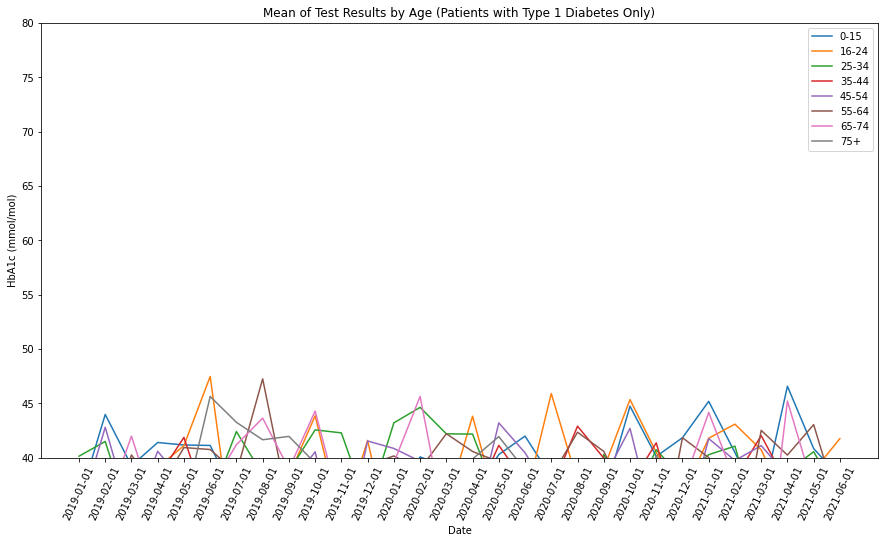

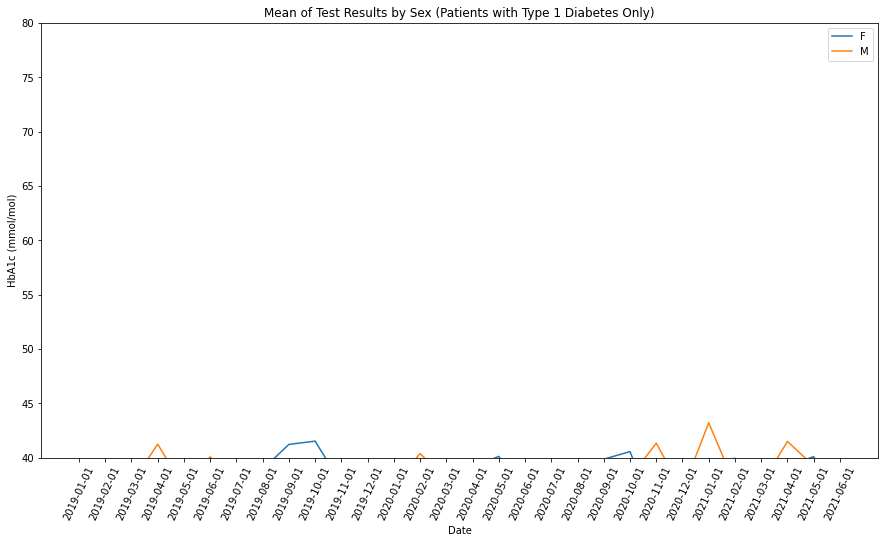

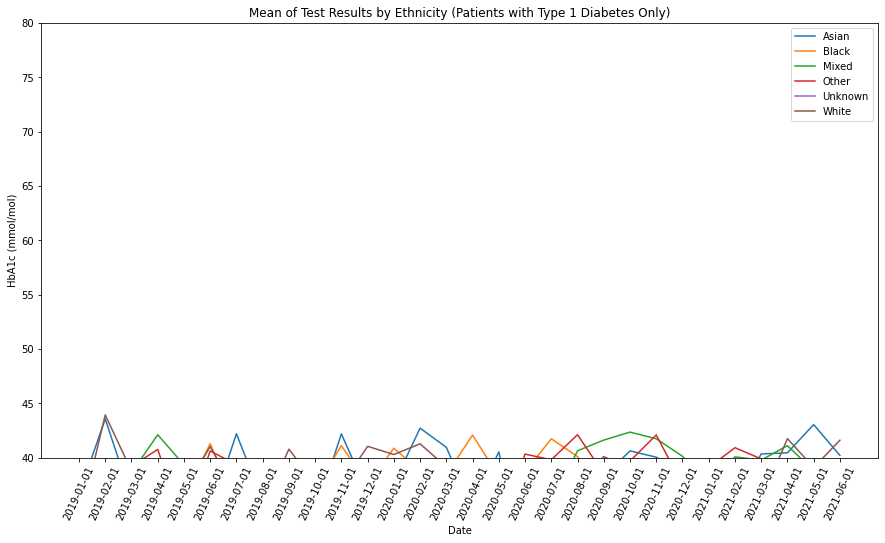

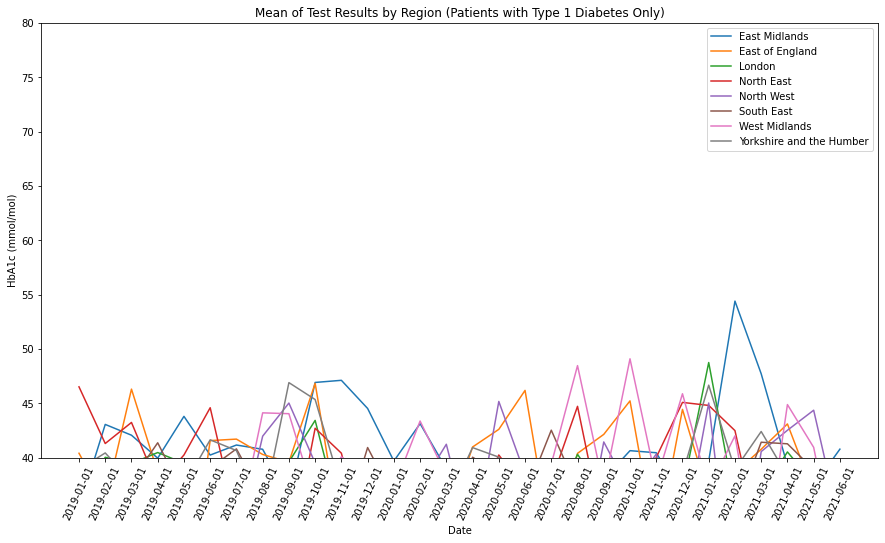

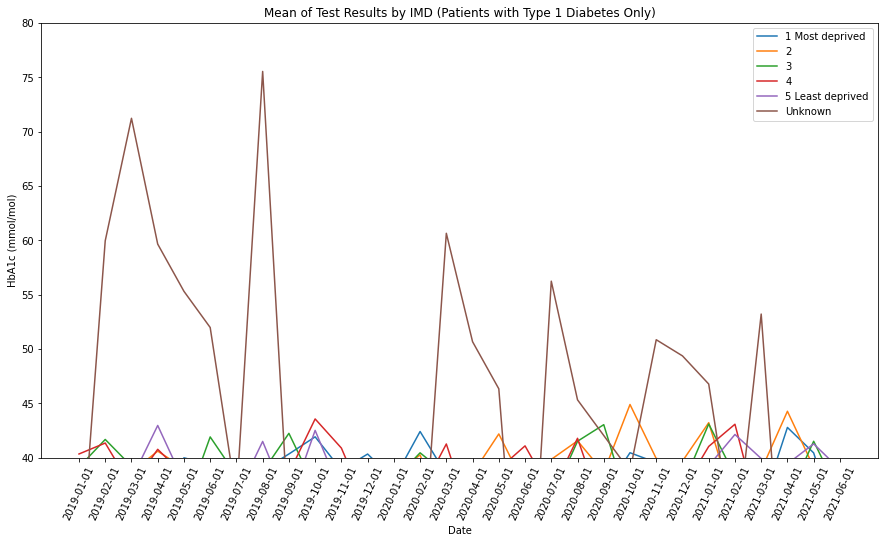

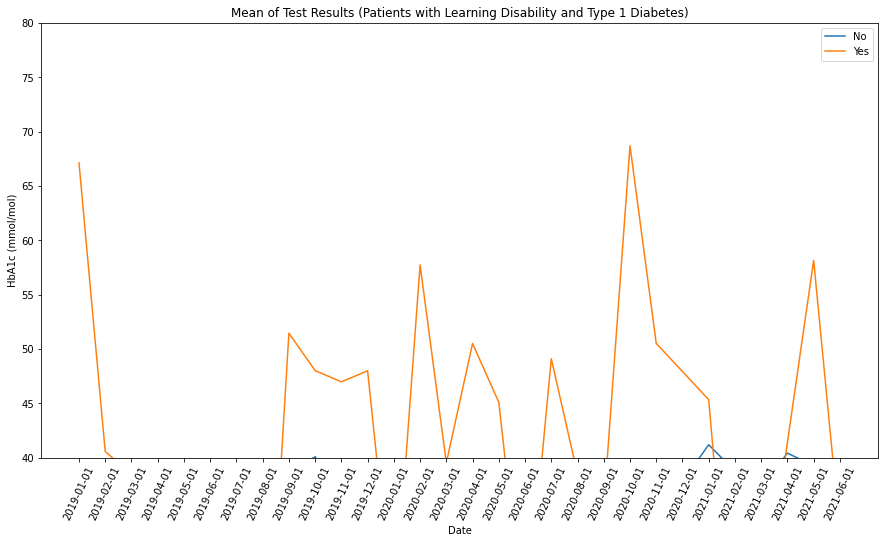

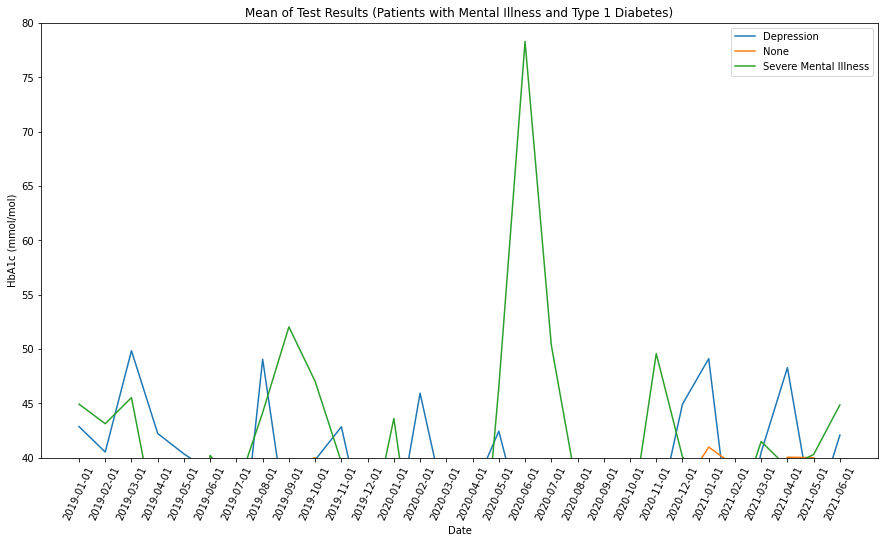

In [9]:
# Population
df_pop_t1 = pd.DataFrame(df_t1.groupby(by=['date'])['hba1c_mmol_per_mol'].mean()).reset_index()
create_chart(df_pop_t1, 'population', 
             'Mean of Test Results (Patients with Type 1 Diabetes Only)', t1_min, t1_max)

# Age
df_age_t1 = compute_mean(df_t1, 'age_group')
create_chart(df_age_t1.loc[df_age_t1.age_group != 'missing'], 'age_group', 
             'Mean of Test Results by Age (Patients with Type 1 Diabetes Only)', t1_min, t1_max)

# Sex
df_sex_t1 = compute_mean(df_t1, 'sex')
create_chart(df_sex_t1.loc[df_sex_t1.sex.isin(['F','M'])], 'sex', 
             'Mean of Test Results by Sex (Patients with Type 1 Diabetes Only)', t1_min, t1_max)

# Ethnicity
df_eth_t1 = compute_mean(df_t1, 'ethnicity')
create_chart(df_eth, 'ethnicity', 
             'Mean of Test Results by Ethnicity (Patients with Type 1 Diabetes Only)', t1_min, t1_max)

# Region
df_region_t1 = compute_mean(df_t1, 'region')
create_chart(df_region_t1, 'region', 
             'Mean of Test Results by Region (Patients with Type 1 Diabetes Only)', t1_min, t1_max)

# IMD
df_imd_t1 = compute_mean(df_t1, 'imd')
create_chart(df_imd_t1, 'imd', 
             'Mean of Test Results by IMD (Patients with Type 1 Diabetes Only)', t1_min, t1_max)

# Learning Disability
df_ld_t1 = compute_mean(df_t1, 'learning_disability')
create_chart(df_ld_t1, 'learning_disability', 'Mean of Test Results (Patients with Learning Disability and Type 1 Diabetes)', 
             t1_min, t1_max)

# Mental Illness
df_mi_t1 = compute_mean(df_t1, 'mental_illness')
create_chart(df_mi_t1, 'mental_illness', 'Mean of Test Results (Patients with Mental Illness and Type 1 Diabetes)', 
             t1_min, t1_max)

In [10]:
### Create and display tables showing exact values by month

# Population
display(df_pop_t1)

# Age 
display(df_wide(df_age_t1, 'age_group'))

# Sex
display(df_wide(df_sex_t1, 'sex'))

# Ethnicity
df_eth_t1_wide = df_wide(df_eth_t1, 'ethnicity')
df_eth_t1_wide = df_eth_t1_wide[['Asian', 'Black', 'Mixed', 'White', 'Other', 'Unknown']]
display(df_eth_t1_wide)

# Region
display(df_wide(df_region_t1, 'region'))

# IMD
display(df_wide(df_imd_t1, 'imd'))

# Learning Disability
display(df_wide(df_ld_t1, 'learning_disability'))

# Mental Illness
df_mi_t1_wide = df_wide(df_mi_t1, 'mental_illness')
df_mi_t1_wide = df_mi_t1_wide[['None', 'Depression', 'Severe Mental Illness']]
display(df_mi_t1_wide)

,date,hba1c_mmol_per_mol
0,2019-01-01,36.720177
1,2019-02-01,38.796427
2,2019-03-01,38.200411
3,2019-04-01,38.465594
4,2019-05-01,38.345021
5,2019-06-01,39.169538
6,2019-07-01,37.847289
7,2019-08-01,39.326874
8,2019-09-01,39.013841
9,2019-10-01,40.198085


age_group,0-15,16-24,25-34,35-44,45-54,55-64,65-74,75+,missing
date,,,,,,,,,
2019-01-01,35.976545,38.931248,40.145481,39.324498,34.734996,33.304808,34.144056,37.066938,35.948904
2019-02-01,43.986168,34.231022,41.499476,37.129217,42.809098,33.256627,35.194360,39.383826,42.527825
2019-03-01,39.272632,38.675302,33.929869,37.759664,34.456034,40.258639,41.988330,37.881365,58.005604
2019-04-01,41.404151,39.102083,37.340886,38.190385,40.595523,36.936604,34.494270,37.526410,41.542674
2019-05-01,41.175686,41.117709,31.296944,41.876502,37.648695,40.938494,33.060013,35.401223,49.508905
2019-06-01,41.133994,47.480015,36.197897,34.553809,31.053045,40.760758,37.204850,45.639551,38.141102
2019-07-01,36.292675,29.715295,42.409406,34.507562,36.962636,38.621415,41.200113,43.259393,42.559867
2019-08-01,39.278172,31.041381,38.439294,38.012066,38.596254,47.261026,43.649056,41.657464,29.966886
2019-09-01,38.966645,38.318293,38.747645,38.782140,37.420811,35.406454,38.960474,41.967740,45.206063


sex,F,M
date,,
2019-01-01,36.134632,37.320931
2019-02-01,38.197433,39.406940
2019-03-01,38.660274,37.632549
2019-04-01,36.284624,41.253300
2019-05-01,39.578411,37.217118
2019-06-01,38.382908,40.090062
2019-07-01,38.075653,37.583294
2019-08-01,38.941340,39.681971
2019-09-01,41.229502,36.650469


ethnicity,Asian,Black,Mixed,White,Other,Unknown
date,,,,,,
2019-01-01,37.581964,47.816346,22.754418,34.294671,19.301083,37.007164
2019-02-01,30.635535,31.146308,35.662871,45.820681,65.170123,38.622822
2019-03-01,36.343610,4.505339,38.786612,53.387840,30.526538,38.571638
2019-04-01,48.028746,39.913012,67.093607,61.251879,NaN,37.988773
2019-05-01,44.124493,25.067769,49.531012,30.769762,39.109341,38.404136
2019-06-01,60.226078,24.133676,NaN,28.634476,0.000000,39.330736
2019-07-01,NaN,34.395739,25.379174,39.011399,50.155695,37.890499
2019-08-01,23.546969,20.505118,39.167666,57.122947,57.970957,38.778784
2019-09-01,36.533221,31.011036,42.072786,45.266186,35.572491,39.076376


region,East Midlands,East of England,London,North East,North West,South East,West Midlands,Yorkshire and the Humber
date,,,,,,,,
2019-01-01,35.342872,40.417881,35.943290,46.526032,32.844916,38.551725,31.271659,38.928664
2019-02-01,43.068039,35.959403,40.044584,41.312714,36.138274,37.578021,36.825348,40.445951
2019-03-01,42.076899,46.314889,39.473013,43.250150,39.905398,37.887412,28.091729,37.822566
2019-04-01,39.965170,38.661531,40.482112,37.489440,33.531148,41.379709,37.848568,38.441496
2019-05-01,43.810239,25.012578,39.493679,40.256725,38.508287,36.604133,38.265287,37.463640
2019-06-01,40.250525,41.581117,37.328920,44.604246,35.753888,39.046875,35.792368,41.651164
2019-07-01,41.172759,41.717224,37.170090,34.227217,31.692662,40.818460,32.669516,40.664408
2019-08-01,40.781331,40.306709,35.576671,37.429920,41.986921,36.398824,44.132975,35.175268
2019-09-01,36.361670,39.594271,39.620129,30.368797,45.034535,34.584205,44.055229,46.913248


imd,1 Most deprived,2,3,4,5 Least deprived,Unknown
date,,,,,,
2019-01-01,35.875573,34.248585,39.136281,40.348907,33.776485,27.767847
2019-02-01,35.559259,38.102108,41.685926,41.356422,37.259159,59.961424
2019-03-01,37.019691,38.685324,39.224735,37.311866,38.020481,71.225316
2019-04-01,33.927625,40.609160,34.145595,40.778809,42.972228,59.654250
2019-05-01,39.998023,39.042926,35.200347,38.407902,37.756060,55.311523
2019-06-01,39.369950,38.808113,41.918003,36.096901,38.197296,51.983925
2019-07-01,39.859794,37.556577,38.370240,36.984686,36.488649,36.254025
2019-08-01,38.846193,37.083714,38.707979,39.598427,41.503697,75.535979
2019-09-01,40.349475,38.596042,42.249469,38.588050,35.659013,33.329848


learning_disability,No,Yes
date,,
2019-01-01,36.424980,67.125535
2019-02-01,38.750382,40.563382
2019-03-01,38.198174,38.528166
2019-04-01,38.591219,19.559152
2019-05-01,38.340868,38.945033
2019-06-01,39.253047,30.735064
2019-07-01,37.901726,34.591955
2019-08-01,39.422924,11.376349
2019-09-01,38.726372,51.457131


mental_illness,None,Depression,Severe Mental Illness
date,,,
2019-01-01,36.182429,42.870505,44.934472
2019-02-01,38.621784,40.530584,43.134371
2019-03-01,37.329641,49.844378,45.537356
2019-04-01,38.397731,42.233057,33.116690
2019-05-01,38.481809,40.358786,29.845807
2019-06-01,39.176956,38.761829,40.219196
2019-07-01,38.463270,26.554236,37.026152
2019-08-01,38.944615,49.063327,44.160798
2019-09-01,39.236923,32.578664,52.038863


## Tests Taken by Patients with Type 2 Diabetes

In [11]:
t2_min = 50
t2_max = 80

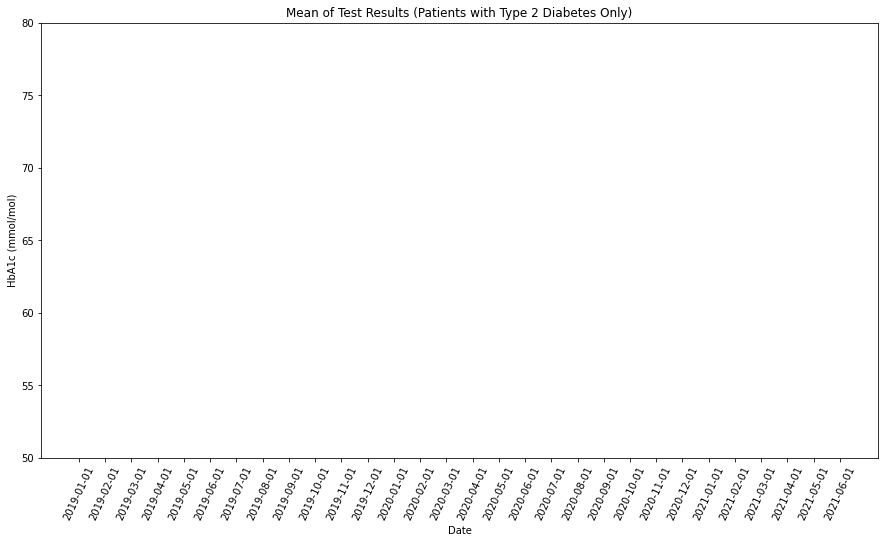

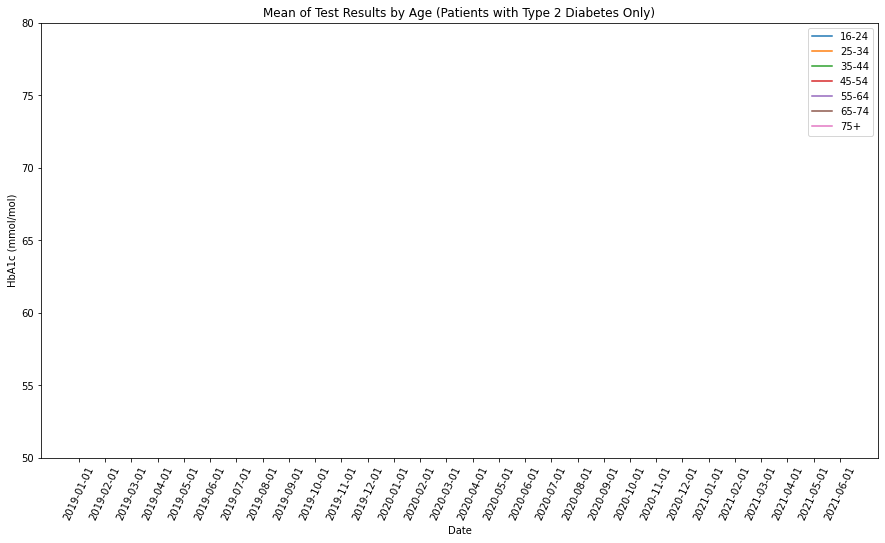

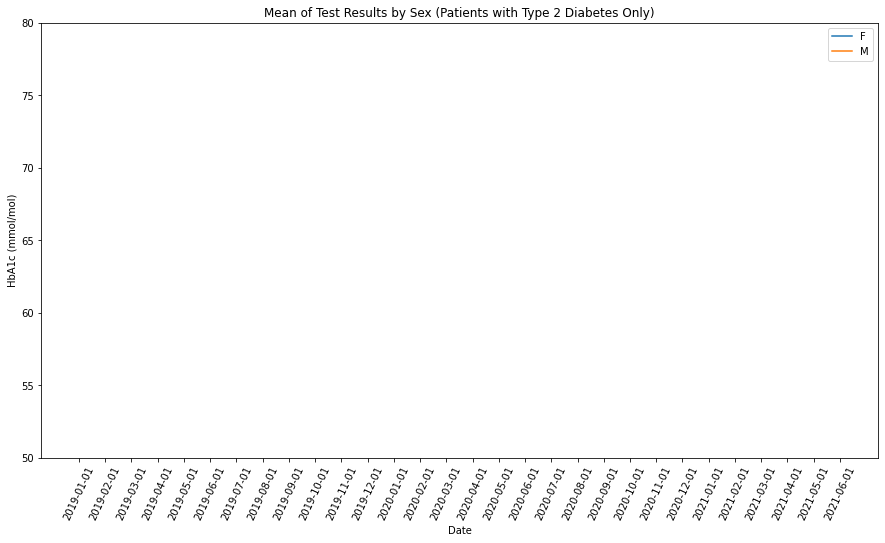

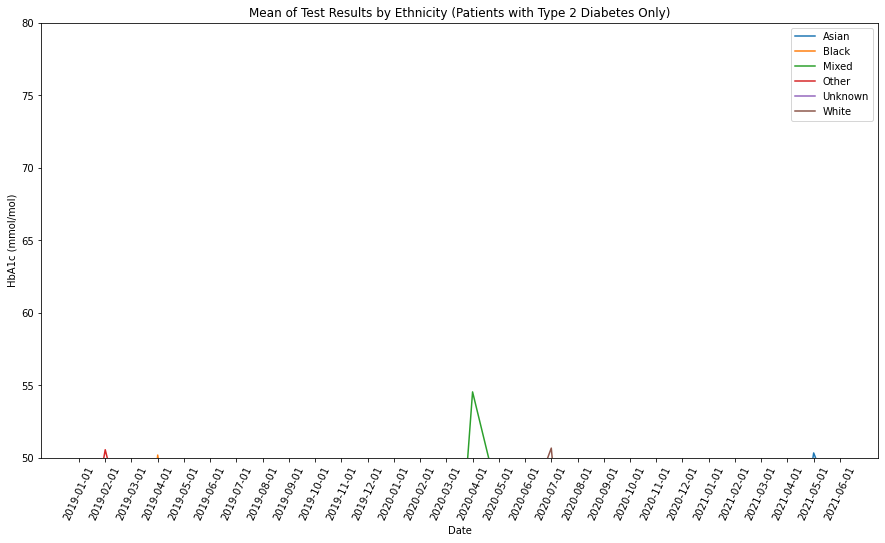

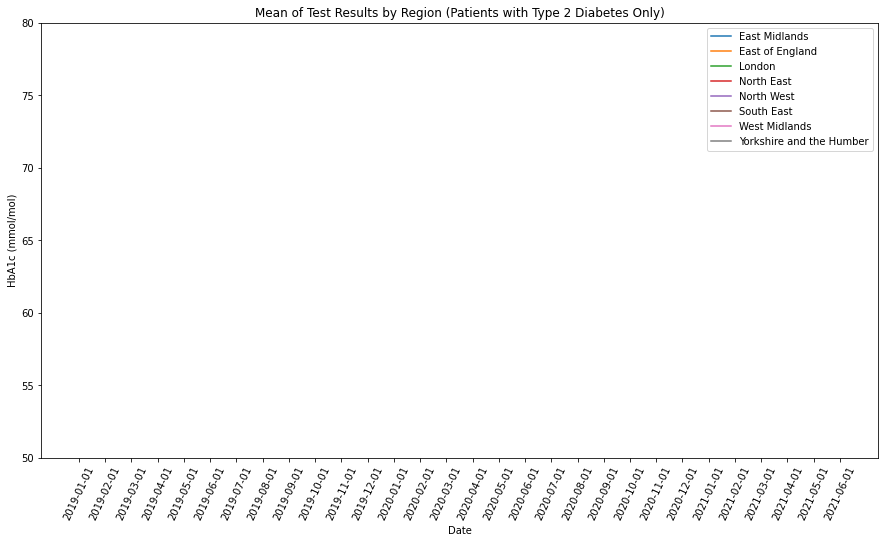

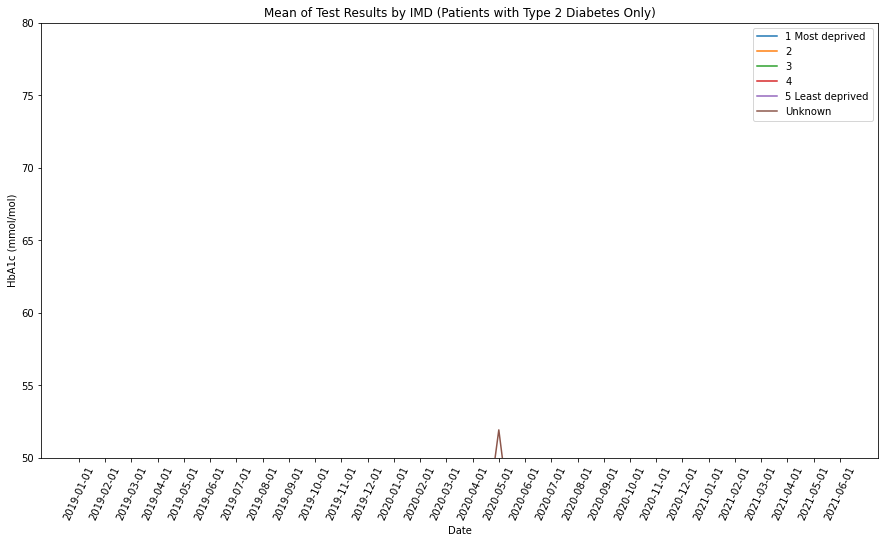

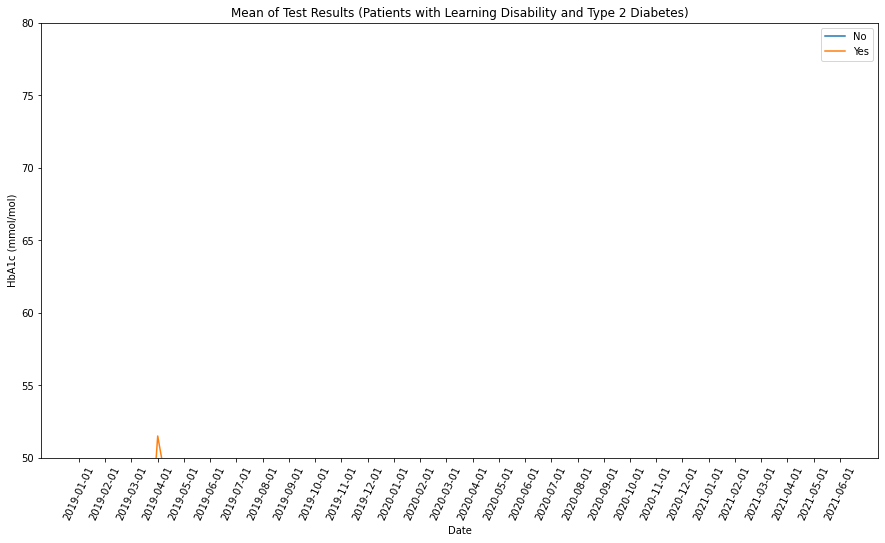

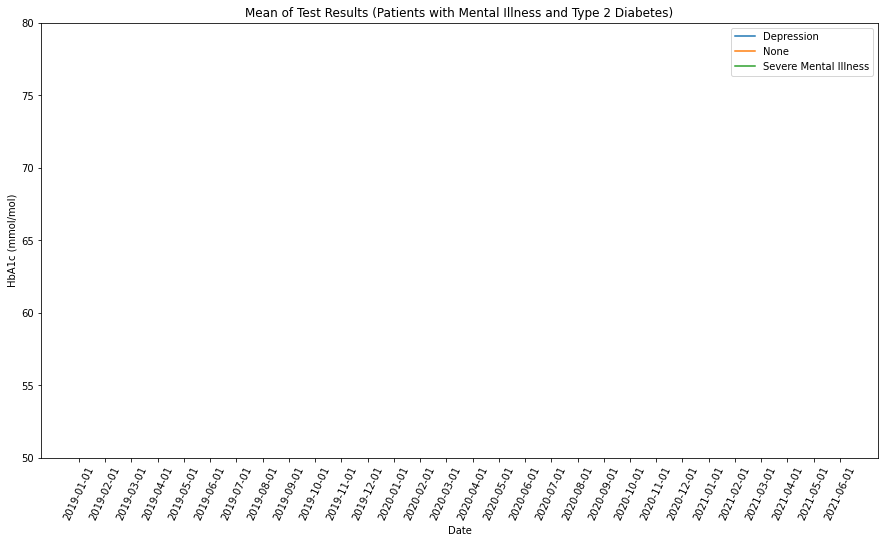

In [12]:
# Population
df_pop_t2 = pd.DataFrame(df_t2.groupby(by=['date'])['hba1c_mmol_per_mol'].mean()).reset_index()
create_chart(df_pop_t2, 'population', 
             'Mean of Test Results (Patients with Type 2 Diabetes Only)', t2_min, t2_max)

# Age
df_age_t2 = compute_mean(df_t2, 'age_group')
create_chart(df_age_t2.loc[~df_age_t2.age_group.isin(['missing','0-15'])], 'age_group', 
             'Mean of Test Results by Age (Patients with Type 2 Diabetes Only)', t2_min, t2_max)

# Sex
df_sex_t2 = compute_mean(df_t2, 'sex')
create_chart(df_sex_t2.loc[df_sex_t2.sex.isin(['F','M'])], 'sex', 
             'Mean of Test Results by Sex (Patients with Type 2 Diabetes Only)', t2_min, t2_max)

# Ethnicity
df_eth_t2 = compute_mean(df_t2, 'ethnicity')
create_chart(df_eth_t2, 'ethnicity', 
             'Mean of Test Results by Ethnicity (Patients with Type 2 Diabetes Only)', t2_min, t2_max)

# Region
df_region_t2 = compute_mean(df_t2, 'region')
create_chart(df_region_t2, 'region', 
             'Mean of Test Results by Region (Patients with Type 2 Diabetes Only)', t2_min, t2_max)

# IMD
df_imd_t2 = compute_mean(df_t2, 'imd')
create_chart(df_imd_t2, 'imd', 
             'Mean of Test Results by IMD (Patients with Type 2 Diabetes Only)', t2_min, t2_max)

# Learning Disability
df_ld_t2 = compute_mean(df_t2, 'learning_disability')
create_chart(df_ld_t2, 'learning_disability', 'Mean of Test Results (Patients with Learning Disability and Type 2 Diabetes)', 
             t2_min, t2_max)

# Mental Illness
df_mi_t2 = compute_mean(df_t2, 'mental_illness')
create_chart(df_mi_t2, 'mental_illness', 'Mean of Test Results (Patients with Mental Illness and Type 2 Diabetes)', 
             t2_min, t2_max)

In [13]:
### Create and display tables showing exact values by month

# Population
display(df_pop_t2)

# Age 
display(df_wide(df_age_t2, 'age_group'))

# Sex
display(df_wide(df_sex_t2, 'sex'))

# Ethnicity
df_eth_t2_wide = df_wide(df_eth_t2, 'ethnicity')
df_eth_t2_wide = df_eth_t2_wide[['Asian', 'Black', 'Mixed', 'White', 'Other', 'Unknown']]
display(df_eth_t2_wide)

# Region
display(df_wide(df_region_t2, 'region'))

# IMD
display(df_wide(df_imd_t2, 'imd'))

# Learning Disability
display(df_wide(df_ld_t2, 'learning_disability'))

# Mental Illness
df_mi_t2_wide = df_wide(df_mi_t2, 'mental_illness')
df_mi_t2_wide = df_mi_t2_wide[['None', 'Depression', 'Severe Mental Illness']]
display(df_mi_t2_wide)

,date,hba1c_mmol_per_mol
0,2019-01-01,38.194729
1,2019-02-01,38.840375
2,2019-03-01,37.741381
3,2019-04-01,38.155113
4,2019-05-01,37.445512
5,2019-06-01,38.271192
6,2019-07-01,38.383199
7,2019-08-01,37.768321
8,2019-09-01,37.649595
9,2019-10-01,38.580738


age_group,0-15,16-24,25-34,35-44,45-54,55-64,65-74,75+,missing
date,,,,,,,,,
2019-01-01,37.267998,37.497848,36.718663,39.699805,37.600907,37.959705,38.491085,39.412673,42.688911
2019-02-01,39.846809,38.850520,37.604076,37.823782,37.311246,40.796200,37.907537,39.976246,37.785530
2019-03-01,36.514105,35.570896,39.210539,39.833650,36.769951,40.108949,39.714899,36.055474,34.197823
2019-04-01,40.012195,39.227668,36.077225,36.050615,39.097029,37.862004,37.879876,38.094472,40.134244
2019-05-01,36.872379,38.030519,38.314849,36.810445,39.331945,37.910313,37.854520,35.894800,38.281014
2019-06-01,38.552235,38.138339,37.143169,39.488208,39.969612,37.898124,39.873673,35.818532,37.719289
2019-07-01,38.384277,38.782348,38.253405,40.035760,38.173664,36.657953,34.691648,41.144924,33.508508
2019-08-01,38.301361,37.017358,38.184375,37.208460,37.179698,36.409916,39.754850,37.901848,35.846478
2019-09-01,35.848868,40.094926,36.186933,38.689523,36.426289,37.407089,39.677059,38.300689,37.932662


sex,F,M
date,,
2019-01-01,37.580951,38.815258
2019-02-01,39.351061,38.318306
2019-03-01,37.930588,37.525087
2019-04-01,38.192064,38.116860
2019-05-01,37.325906,37.561332
2019-06-01,37.930629,38.625718
2019-07-01,38.723978,38.012772
2019-08-01,37.057042,38.478887
2019-09-01,38.013265,37.289889


ethnicity,Asian,Black,Mixed,White,Other,Unknown
date,,,,,,
2019-01-01,43.999032,33.034331,34.606321,34.550851,40.309023,38.204163
2019-02-01,41.574207,36.938991,34.249361,40.707535,50.555917,38.740775
2019-03-01,37.317332,30.011728,42.155876,31.362713,43.261635,37.753631
2019-04-01,30.374373,50.188648,35.391610,31.567181,43.808286,38.115648
2019-05-01,40.668517,37.509098,37.417942,35.073491,36.131322,37.458724
2019-06-01,44.222751,36.848619,35.611455,33.560535,35.335310,38.332613
2019-07-01,43.323423,36.291110,33.505414,32.486731,37.986296,38.462648
2019-08-01,23.155182,39.681722,37.665812,31.308273,34.749400,38.029981
2019-09-01,45.296551,26.939016,43.217983,34.010917,39.642153,37.623204


region,East Midlands,East of England,London,North East,North West,South East,West Midlands,Yorkshire and the Humber
date,,,,,,,,
2019-01-01,36.440038,39.761343,37.650616,37.017237,38.317344,40.332112,36.335128,39.948652
2019-02-01,41.782625,41.050882,38.155874,39.295867,37.850765,36.778686,39.412367,38.396452
2019-03-01,36.979421,37.703385,37.067851,38.072128,38.490894,38.049416,39.034586,38.984508
2019-04-01,38.777308,37.085561,38.381017,39.628981,38.089585,37.623177,36.992800,39.191760
2019-05-01,39.006097,39.113577,37.282425,34.082895,36.184745,40.276661,36.305096,37.862940
2019-06-01,38.546101,35.463442,38.338504,37.859215,38.279392,38.372229,39.911581,37.447557
2019-07-01,37.120442,37.333779,39.538289,40.565614,37.160923,38.045308,38.870939,38.595823
2019-08-01,35.086035,35.622734,39.514383,36.383755,37.324289,37.204591,40.067705,38.028243
2019-09-01,39.468926,37.709043,37.484901,35.498996,38.485498,39.590188,36.519413,37.896543


imd,1 Most deprived,2,3,4,5 Least deprived,Unknown
date,,,,,,
2019-01-01,37.869214,37.054513,38.696954,38.323835,39.218253,35.528910
2019-02-01,39.078319,37.589267,38.702646,40.241735,38.171459,48.136340
2019-03-01,38.264296,38.197474,36.918310,37.389950,37.410501,46.750090
2019-04-01,39.266739,37.251762,38.547824,38.380097,37.685388,31.143123
2019-05-01,38.257636,36.501730,38.323294,37.263666,36.620686,43.950852
2019-06-01,37.143573,39.047638,37.881209,38.472540,38.607638,40.659043
2019-07-01,39.226734,37.983779,36.972091,38.473871,39.413556,37.470517
2019-08-01,38.784797,39.130208,37.310367,37.270360,36.267341,39.602321
2019-09-01,38.594465,38.365233,36.160885,37.897415,37.544124,31.927548


learning_disability,No,Yes
date,,
2019-01-01,38.178967,40.442981
2019-02-01,38.761884,48.553606
2019-03-01,37.872545,25.823375
2019-04-01,38.015109,51.502149
2019-05-01,37.414399,41.284048
2019-06-01,38.266183,38.834183
2019-07-01,38.464820,32.063882
2019-08-01,37.819477,31.447360
2019-09-01,37.674619,34.884380


mental_illness,None,Depression,Severe Mental Illness
date,,,
2019-01-01,38.224445,37.308917,38.637662
2019-02-01,38.820049,40.154687,35.545640
2019-03-01,37.627444,38.283094,41.990835
2019-04-01,38.307188,38.353271,29.854129
2019-05-01,37.302773,41.237720,32.883794
2019-06-01,38.340777,35.969852,40.274439
2019-07-01,38.230184,39.959068,42.410453
2019-08-01,37.833841,36.958806,36.710182
2019-09-01,37.632903,39.367375,33.841866
